In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy 
import os
import re
import MDAnalysis
import nmrglue as ng
%matplotlib inline

# This is the analysis notebook for KcsA inactivated state
The trajactory is based on PDB 5KVE and 100 ns MD simulation, frames are saved every 100 ps and of the 1000 saved frames, 1/10 are evenly sampled to run restrainted minimized, results of which are used for AF-NMR MM/QM calculation 

Data location:  
MD trajctory:/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/kcsa_inactivation_3_trj
calcualted CS results:/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/results
Mimimized snapshots:/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/minimized_snapshots

In [2]:
#directory for calcuated chemical shift inforamtion
dir_cc='/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/results'
# read files that starts with results
ccinactivated_dict={}
for file in os.listdir(dir_cc):
    if file[0]=='r':
        full_f=os.path.join(dir_cc,file)
        ccinactivated_dict[file.rstrip('.txt')]=pd.read_csv(full_f, sep='\t', header=None, names=['resNO','atom','resNam','iso','delta','ita','alpha','betta','gamma'])
            
        

In [3]:
#test if data were correctly read
if 'results_0' in ccinactivated_dict.keys():
    print('yes')

yes


In [7]:
#first to check chemical shift for V76 ang G77 residues
#index for V77:V76_index=[76-22+n*103+1 for n in range(4)]
#index for G77:
#testing whether indexing is right
'''
V76_index=[76-22+n*103+1 for n in range(4)]
V76_index
[55, 158, 261, 364]
match with the QM output indexing
'''


'\nV76_index=[76-22+n*103+1 for n in range(4)]\nV76_index\n[55, 158, 261, 364]\n'

In [49]:
# a glimpse of the QM output
ccinactivated_dict['results_0']

# we will add frame number to the data
for key in ccinactivated_dict.keys():
    ccinactivated_dict[key]['frame']=[int(re.findall(r'\d+', key)[0])]*len(ccinactivated_dict[key])
    #ccinactivated_dict[key]['resNO']=[int(re.findall(r'\d+', key)[1])]*len(ccinactivated_dict[key])


ccinactivated_df=pd.concat(ccinactivated_dict.values(), ignore_index=True)

# sort the data by frame number and the residue number
ccinactivated_df.sort_values(by=['frame', 'resNO'], inplace=True)
# check the data
ccinactivated_df.head()

# save the data to a csv file
ccinactivated_df.to_csv('KcsA_inactivated_df_MMQM_CS.csv', index=False)

# plot the chemical shift for V76 and G77

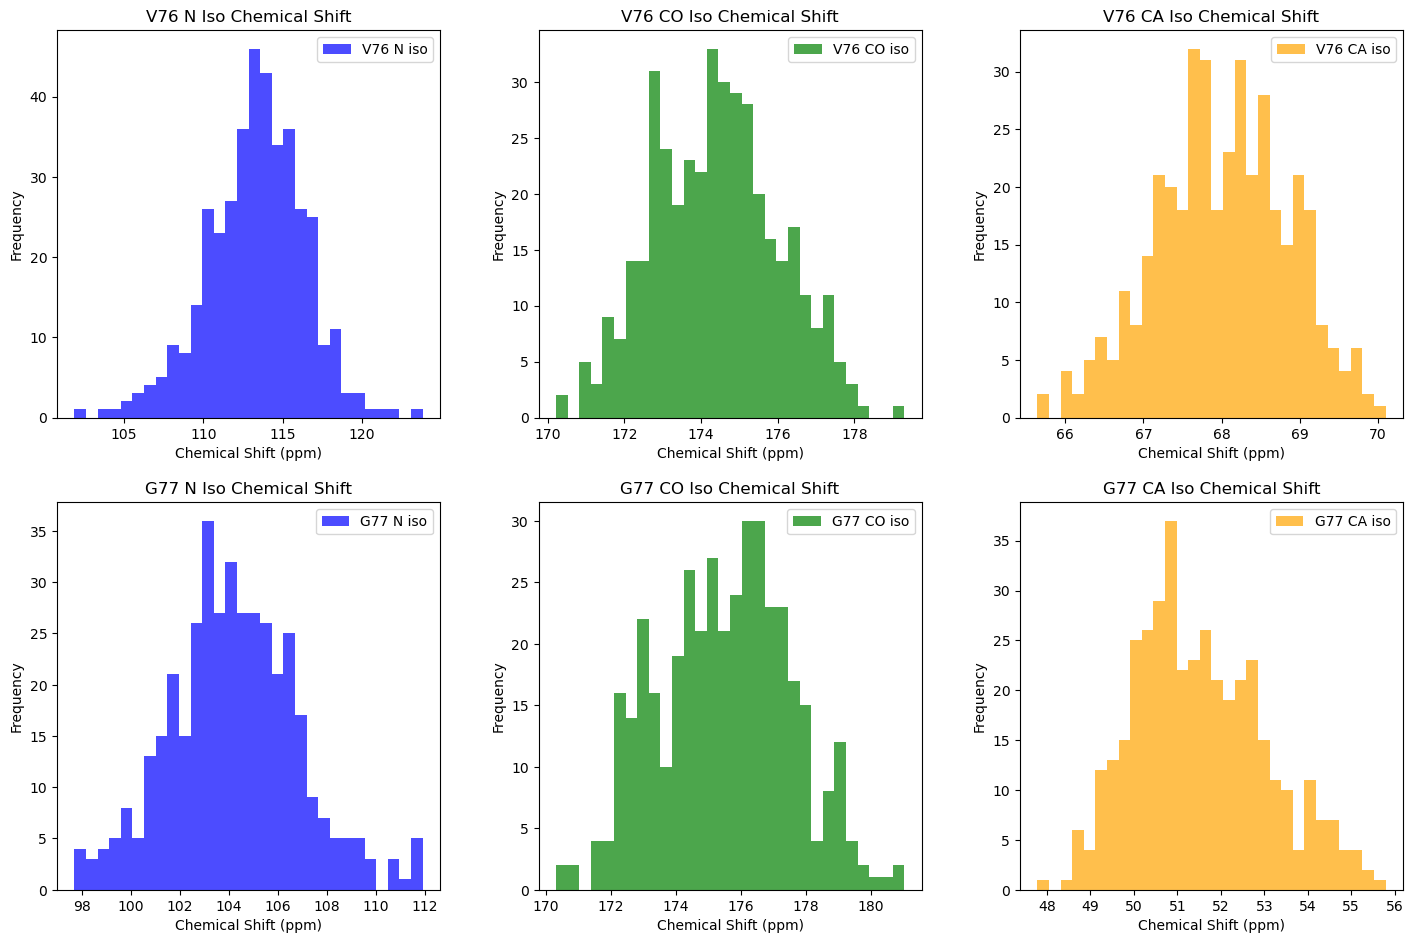

In [43]:
import matplotlib.pyplot as plt

# Define indices for residues
V76_index = [76 - 26 + n * 96 + 1 for n in range(4)]
G77_index = [77 - 26 + n * 96 + 1 for n in range(4)]

# Filter rows for V76 and exclude rows where 'atom' starts with 'H'
V76_df = ccinactivated_df[
    ccinactivated_df['resNO'].isin(V76_index) &
    (~ccinactivated_df['atom'].str.startswith('H'))
].copy()

# Filter rows for G77 and exclude rows where 'atom' starts with 'H'
G77_df = ccinactivated_df[
    ccinactivated_df['resNO'].isin(G77_index) &
    (~ccinactivated_df['atom'].str.startswith('H'))
].copy()

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Define colors for N, C, CA
colors = {'N': 'blue', 'C': 'green', 'CA': 'orange'}

# Plot histograms for V76
axes[0, 0].hist(V76_df[V76_df['atom'] == 'N']['iso'], bins=30, alpha=0.7, color=colors['N'], label='V76 N iso')
axes[0, 0].set_title('V76 N Iso Chemical Shift')
axes[0, 0].set_xlabel('Chemical Shift (ppm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

axes[0, 1].hist(V76_df[V76_df['atom'] == 'C']['iso'], bins=30, alpha=0.7, color=colors['C'], label='V76 CO iso')
axes[0, 1].set_title('V76 CO Iso Chemical Shift')
axes[0, 1].set_xlabel('Chemical Shift (ppm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

axes[0, 2].hist(V76_df[V76_df['atom'] == 'CA']['iso'], bins=30, alpha=0.7, color=colors['CA'], label='V76 CA iso')
axes[0, 2].set_title('V76 CA Iso Chemical Shift')
axes[0, 2].set_xlabel('Chemical Shift (ppm)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Plot histograms for G77
axes[1, 0].hist(G77_df[G77_df['atom'] == 'N']['iso'], bins=30, alpha=0.7, color=colors['N'], label='G77 N iso')
axes[1, 0].set_title('G77 N Iso Chemical Shift')
axes[1, 0].set_xlabel('Chemical Shift (ppm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

axes[1, 1].hist(G77_df[G77_df['atom'] == 'C']['iso'], bins=30, alpha=0.7, color=colors['C'], label='G77 CO iso')
axes[1, 1].set_title('G77 CO Iso Chemical Shift')
axes[1, 1].set_xlabel('Chemical Shift (ppm)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

axes[1, 2].hist(G77_df[G77_df['atom'] == 'CA']['iso'], bins=30, alpha=0.7, color=colors['CA'], label='G77 CA iso')
axes[1, 2].set_title('G77 CA Iso Chemical Shift')
axes[1, 2].set_xlabel('Chemical Shift (ppm)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

# Show the plot
plt.show()


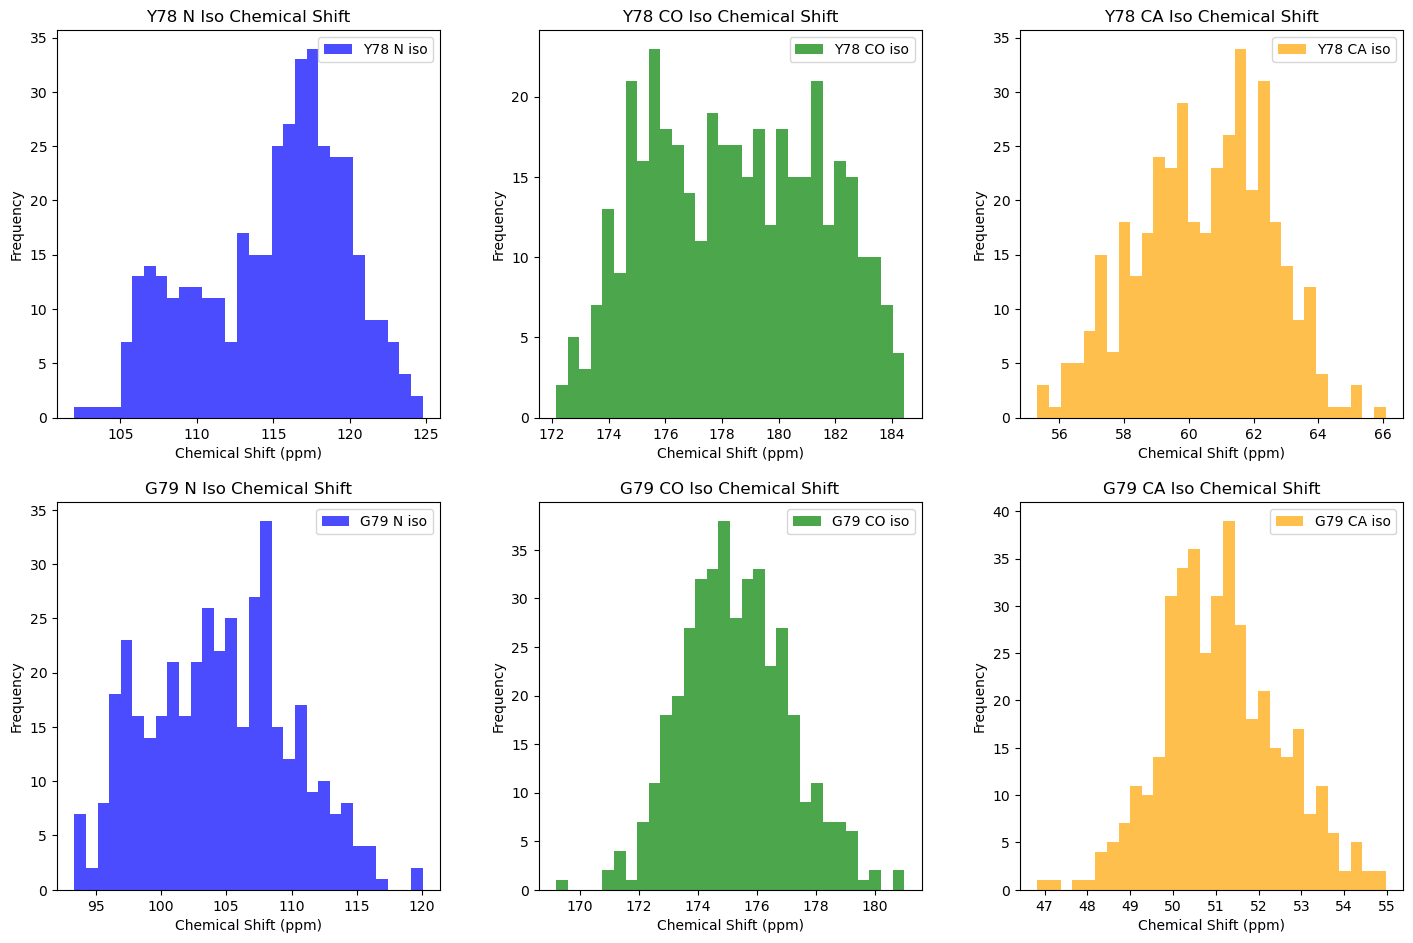

In [42]:
import matplotlib.pyplot as plt

# Define indices for residues
Y78_index = [78 - 26 + n * 96 + 1 for n in range(4)]
G79_index = [79 - 26 + n * 96 + 1 for n in range(4)]

# Filter rows for Y78 and exclude rows where 'atom' starts with 'H'
Y78_df = ccinactivated_df[
    ccinactivated_df['resNO'].isin(Y78_index) &
    (~ccinactivated_df['atom'].str.startswith('H'))
].copy()

# Filter rows for G79 and exclude rows where 'atom' starts with 'H'
G79_df = ccinactivated_df[
    ccinactivated_df['resNO'].isin(G79_index) &
    (~ccinactivated_df['atom'].str.startswith('H'))
].copy()

# Create 2x3 subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.tight_layout(pad=4.0)  # Adjust spacing between subplots

# Define colors for N, C, CA
colors = {'N': 'blue', 'C': 'green', 'CA': 'orange'}

# Plot histograms for Y78
axes[0, 0].hist(Y78_df[Y78_df['atom'] == 'N']['iso'], bins=30, alpha=0.7, color=colors['N'], label='Y78 N iso')
axes[0, 0].set_title('Y78 N Iso Chemical Shift')
axes[0, 0].set_xlabel('Chemical Shift (ppm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

axes[0, 1].hist(Y78_df[Y78_df['atom'] == 'C']['iso'], bins=30, alpha=0.7, color=colors['C'], label='Y78 CO iso')
axes[0, 1].set_title('Y78 CO Iso Chemical Shift')
axes[0, 1].set_xlabel('Chemical Shift (ppm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

axes[0, 2].hist(Y78_df[Y78_df['atom'] == 'CA']['iso'], bins=30, alpha=0.7, color=colors['CA'], label='Y78 CA iso')
axes[0, 2].set_title('Y78 CA Iso Chemical Shift')
axes[0, 2].set_xlabel('Chemical Shift (ppm)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Plot histograms for G79
axes[1, 0].hist(G79_df[G79_df['atom'] == 'N']['iso'], bins=30, alpha=0.7, color=colors['N'], label='G79 N iso')
axes[1, 0].set_title('G79 N Iso Chemical Shift')
axes[1, 0].set_xlabel('Chemical Shift (ppm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

axes[1, 1].hist(G79_df[G79_df['atom'] == 'C']['iso'], bins=30, alpha=0.7, color=colors['C'], label='G79 CO iso')
axes[1, 1].set_title('G79 CO Iso Chemical Shift')
axes[1, 1].set_xlabel('Chemical Shift (ppm)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

axes[1, 2].hist(G79_df[G79_df['atom'] == 'CA']['iso'], bins=30, alpha=0.7, color=colors['CA'], label='G79 CA iso')
axes[1, 2].set_title('G79 CA Iso Chemical Shift')
axes[1, 2].set_xlabel('Chemical Shift (ppm)')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()

# Show the plot
plt.show()


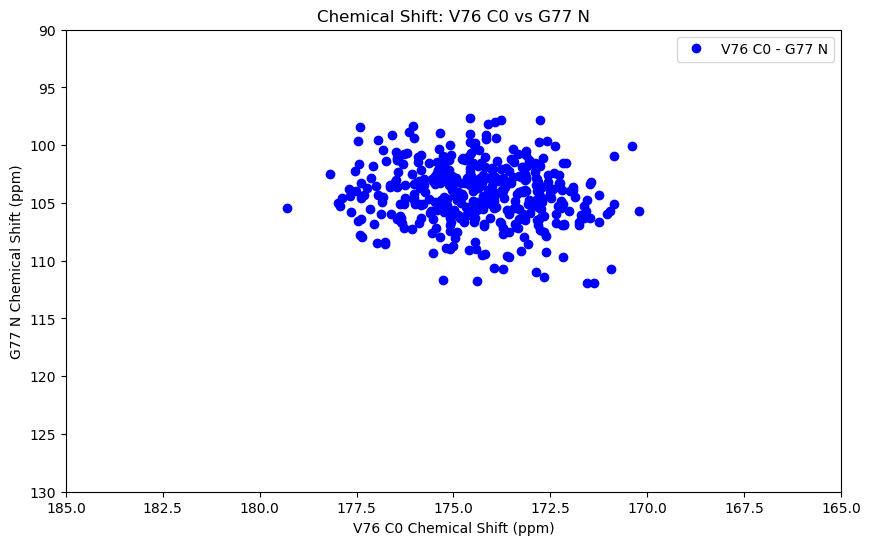

In [48]:
#plot the chemical shift for V76 C0- G77 N
plt.figure(figsize=(10, 6))
# convert data to numpy arrays for plotting
CO= np.array(V76_df[V76_df['atom'] == 'C']['iso'])
N = np.array(G77_df[G77_df['atom'] == 'N']['iso'])      
plt.plot(CO, N, marker='o', linestyle='None', color='blue', label='V76 C0 - G77 N')
plt.title('Chemical Shift: V76 C0 vs G77 N')
plt.xlabel('V76 C0 Chemical Shift (ppm)')
plt.ylabel('G77 N Chemical Shift (ppm)')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='--', linewidth=0.5)
plt.xlim(185, 165)
plt.ylim(130, 90)
#plt.grid()
plt.legend()
plt.show()
#plt.plot(V76_df[V76_df['atom'] == 'C']['iso'], G77_df[G77_df['atom'] == 'N']['iso'],marker='o', label='NCO')

In [53]:
# write a module to read the structure file, calculate torsion angle and add it to the dataframe
import numpy as np
import MDAnalysis 
import pandas as pd
import scipy.stats as stats
import sys
import nmrglue as ng
import os
import matplotlib.pyplot as plt
from MDAnalysis.analysis.dihedrals import Janin
from MDAnalysis.analysis.dihedrals import Dihedral

# read the structure file and calculate the torsion angle
def calculate_torsion_angle(u, residues):
    """
    Calculate the torsion angle between four residues.
    
    Parameters:
    u (MDAnalysis Universe): The universe containing the structure.
    res1, res2, res3, res4 (int): Residue numbers for the four residues.
    
    Returns:
    float: The torsion angle in degrees.
    """
    # Select the atoms for the four residues
    phi_atoms = u.residues[residues].phi_selection()
    psi_atoms = u.residues[residues].psi_selection()
    
    
    # Calculate the dihedral angle
    dihedral_phi = Dihedral(phi_atoms)
    dihedral_psi = Dihedral(psi_atoms)
    #dihedral_phi.run()
    #dihedral_psi.run()

    # Return the angle in degrees
    return dihedral_phi.run().results.angles[0] * 180 / np.pi, dihedral_psi.run().results.angles[0] * 180 / np.pi
    
    #return dihedral_phi.angles[0] * 180 / np.pi  # Convert to degrees


# read the structure file 
# data_dir = '/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/kcsa_inactivation3/QMMM_results/minimized_snapshots'
data_dir = '/Users/yunyao_1/Dropbox/KcsA/kcsa_inactivation3/QMMM_results/minimized_snapshots'
# scan all pdb file in the direcotry, extract the frame number from the file name
pdb_files = [f for f in os.listdir(data_dir) if f.endswith('.pdb')]
# Create a DataFrame to store the torsion angles
torsion_angles = pd.DataFrame(columns=['frame', 'reisdue', 'torsion_angle_phi', 'torsion_angle_psi'])
# Loop through each pdb file and calculate the torsion angle
for pdb_file in pdb_files:
    # file name format: kcsa_inactivation3_0_minimized.pdb
    frame_number = int(pdb_file.split('_')[2])  # Extract frame number from file name
    u = MDAnalysis.Universe(os.path.join(data_dir, pdb_file))
    
    # Calculate the torsion angle for residues in ccinactivated_df's 'resNO' column
    residues = ccinactivated_df['resNO'].unique()  # Get unique residue numbers from the DataFrame
    # calculate the torsion angle for reisdues in residues
    for residue in residues:
        torsion_angle_phi, torsion_angle_psi = calculate_torsion_angle(u, residue)
        # Create a new row with the frame number and torsion angle
        torsion_angle = {
            'frame': frame_number,
            'reisdue': residue,
            'torsion_angle_phi': torsion_angle_phi,
            'torsion_angle_psi': torsion_angle_psi
        }
        # Convert the torsion angle to a DataFrame
        torsion_angle_df = pd.DataFrame([torsion_angle])
        # Append the new row to the torsion_angles DataFrame
        torsion_angles = pd.concat([torsion_angles, torsion_angle_df], ignore_index=True)




TypeError: object of type 'Atom' has no len()

In [56]:
# test the torsion angle calculation 
test_u = MDAnalysis.Universe(os.path.join(data_dir, pdb_files[0]))
test_residue = 76  # Example residue number

phi_atoms = test_u.residues[76].phi_selection()
psi_atoms = test_u.residues[76].psi_selection()
# Calculate the dihedral angle
dihedral_phi = Dihedral(phi_atoms)
dihedral_psi = Dihedral(psi_atoms)
dihedral_phi.run()
dihedral_psi.run()
# Print the angles in degrees
print(f"Phi angle for residue {test_residue}: {dihedral_phi.angles[0] * 180 / np.pi:.2f} degrees")
print(f"Psi angle for residue {test_residue}: {dihedral_psi.angles[0] * 180 / np.pi:.2f} degrees")

print(f"Phi atoms for residue {test_residue}: {phi_atoms}")
print(f"Psi atoms for residue {test_residue}: {psi_atoms}")
#test_phi, test_psi = calculate_torsion_angle(test_u, test_residue)
#print(f"Torsion angle for residue {test_residue}: Phi = {test_phi:.2f} degrees, Psi = {test_psi:.2f} degrees")

TypeError: object of type 'Atom' has no len()

In [ ]:
class Extract_CS:
    def __init__(self, index:int):
        self.index=index
        self.index_list=[76-26+n*96+1  for n in range(4)]
        
        self.letter_to_number = {'a': 0, 'b': 1, 'c': 2, 'd': 3}

    # Function to map number to letter
    def map_to_letter(number):
    # Get the corresponding letter from the dictionary, or 'd' if number exceeds the keys
        return next((letter for letter, num in self.letter_to_number.items() if num == number), 'f')

        
    def extract_csinfo(self, cs_dic: dict):
        """
        input: cs_dic: a dictionary of chemical shift information, keys are results_0, results_1, etc.
        output: self.cs_info: a dictionary of chemical shift information, keys are residue numbers, values are DataFrames with chemical shift info
        """

        self.cs_info={}
        # only heavy atoms are selected
        for key, values in cs_dic.items():
            self.cs_info[int(key.split('_')[-1])]=values[(values['resNO'].isin(self.index_list))&(values['atom'].str.startswith('C')|values['atom'].str.startswith('N'))]
            self.cs_info[int(key.split('_')[-1])]['chain_ID'] = self.cs_info[int(key.split('_')[-1])]['resNO'].apply(lambda x: map_to_letter(int(x / 103)))
        return self.cs_info  
    
    def assign_conformer(self, norm_list):
        for key, df in self.cs_info.items():
    # Check for the tuples in the DataFrame of each key and set the 'class' column accordingly
        #adding class label based on torsion
    # Add class label based on the torsion angles
            for i, row in df.iterrows():
                if (str(key), row['chain_ID']) in norm_list: 
                    #print((str(key), row['resNO']))
                    df.loc[i, 'class'] = 0
                else:
                    df.loc[i, 'class'] = 1
        return self.cs_info
    
    def aggregate_snapshots(self):
        dfs_to_concat = []
        for key, (index, df) in enumerate(self.cs_info.items()):
            df['snap_id'] = index
            dfs_to_concat.append(df)
        df_aggre = pd.concat(dfs_to_concat, ignore_index=True)

        # Rank the DataFrame by 'snap_id'
        df_aggre = df_aggre.sort_values(by=['snap_id', 'resNO'])

        # Save the DataFrame
        df_aggre.to_csv(f'residue_{self.index}_aggregated_snapshots.csv', index=False)  # Adjust file name as needed

        return df_aggre

In [11]:
#reorganize chemical shift values based on torsion angle info
#torsion angle will be list as norm or flip list
#scan through the fliter list, put a new column with 0, 1 based on class
#try one pd first
flip_list=[]
norm_list=[]
import ast
# Read from the text file
with open('norm_torsion_class.txt', 'r') as file:
    line = file.readline()  # Skip the "List 1" title
    while True:
        number = file.readline().strip()
        if number == '':  # Stop reading when an empty line is reached
            break
        norm_list.append(ast.literal_eval(number))
        
with open('flip_torsion_class.txt', 'r') as file:
    line = file.readline()  # Skip the "List 1" title
    while True:
        number = file.readline().strip()
        if number == '':  # Stop reading when an empty line is reached
            break
        flip_list.append(ast.literal_eval(number))

In [12]:
# Map letters to numbers
letter_to_number = {'a': 261, 'b': 55, 'c': 158, 'd': 364}

# Convert letters to numbers in the list
norm_mapped_list = [(key, letter_to_number[val]) for key, val in norm_list]

#print(mapped_list)


In [14]:
#scan through V76_torsion if key in normal marker


for key, df in V76_torsion.items():
    # Check for the tuples in the DataFrame of each key and set the 'class' column accordingly
#adding class label based on torsion
    # Add class label based on the torsion angles
    for i, row in df.iterrows():
        if (str(key), row['resNO']) in norm_mapped_list: # +1 is used to map python to resid
            #print((str(key), row['resNO']))
            V76_torsion[key].loc[i, 'class'] = 0
        else:
            V76_torsion[key].loc[i, 'class'] = 1


In [15]:
N_V76=[]
CO_V76=[]
for entry in V76_torsion.values():
    N_V76.append(entry[entry['atom'] == 'CG1'])
    CO_V76.append(entry[entry['atom'] == 'C'])
    
N_V76_pd=pd.concat(N_V76)
CO_V76_pd=pd.concat(CO_V76)
#CO_V76_pd

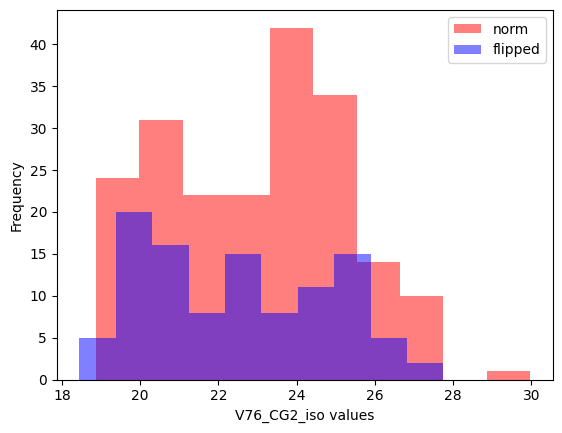

In [16]:
#now plot N distribution
# Create a figure and axis
# Separate iso values based on the 'class'
df=N_V76_pd
class_0_iso = df[df['class'] == 0]['iso']
class_1_iso = df[df['class'] == 1]['iso']

# Plotting
plt.hist(class_0_iso, alpha=0.5, color='red', label='norm')
plt.hist(class_1_iso, alpha=0.5, color='blue', label='flipped')
plt.xlabel('V76_CG2_iso values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

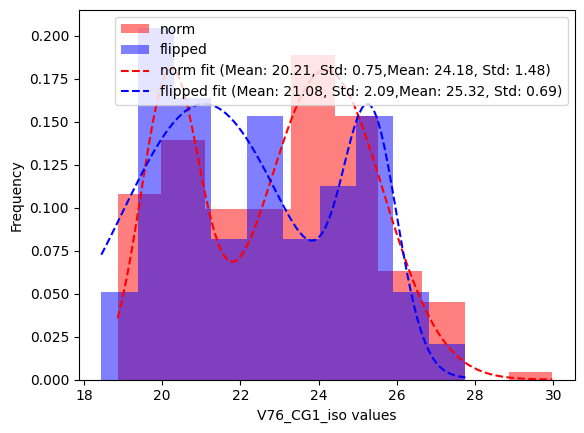

In [83]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Function for the sum of two Gaussian distributions
def double_gaussian(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return (
        A1 * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2) + 
        A2 * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)
    )

# Your existing DataFrame
df = N_V76_pd

# Data for the two classes
class_0_iso = df[df['class'] == 0]['iso']
class_1_iso = df[df['class'] == 1]['iso']

# Plotting histograms
plt.hist(class_0_iso, alpha=0.5, color='red', label='norm', density=True)
plt.hist(class_1_iso, alpha=0.5, color='blue', label='flipped', density=True)
plt.xlabel('V76_CG1_iso values')
plt.ylabel('Frequency')

# Gaussian fit to class 0
mu_0, std_0 = np.mean(class_0_iso), np.std(class_0_iso)
x_0 = np.linspace(min(class_0_iso), max(class_0_iso), 100)
hist_0, bins_0 = np.histogram(class_0_iso, bins=30, density=True)
params_0, _ = curve_fit(
    double_gaussian, 
    0.5 * (bins_0[1:] + bins_0[:-1]), 
    hist_0, 
    #p0=[61, 3, 1,70, 4, 1],
    #p0=[110, 3, 1,120, 4, 1],
    #p0=[175, 3, 1,179, 4, 1],
    #p0=[33.5, 3, 1, 35.5, 4, 1],
    p0=[20, 2, 0.2, 25, 2, 0.2],
    maxfev=5000  # Increase maxfev from the default value
)
plt.plot(
    x_0, 
    double_gaussian(x_0, *params_0), 
    color='red', 
    linestyle='--', 
    label=f'norm fit (Mean: {params_0[0]:.2f}, Std: {params_0[1]:.2f},Mean: {params_0[3]:.2f}, Std: {params_0[4]:.2f})'
)

# Gaussian fit to class 1
mu_1, std_1 = np.mean(class_1_iso), np.std(class_1_iso)
x_1 = np.linspace(min(class_1_iso), max(class_1_iso), 100)
hist_1, bins_1 = np.histogram(class_1_iso, bins=30, density=True)
params_1, _ = curve_fit(
    double_gaussian, 
    0.5 * (bins_1[1:] + bins_1[:-1]), 
    hist_1, 
    #p0=[61, 3, 1,70, 4, 1],
    #p0=[110, 3, 1,120, 4, 1],
    #p0=[174, 3, 1,180, 4, 1],
    #p0=[33.5, 3, 1, 35.5, 4, 1],
    p0=[20, 2, 0.2, 25, 2, 0.2],
    maxfev=5000  # Increase maxfev from the default value
)
plt.plot(
    x_1, 
    double_gaussian(x_1, *params_1), 
    color='blue', 
    linestyle='--', 
    label=f'flipped fit (Mean: {params_1[0]:.2f}, Std: {params_1[1]:.2f},Mean: {params_1[3]:.2f}, Std: {params_1[4]:.2f})'
)

plt.legend()
plt.show()


In [17]:
#do same thing for G77
#extrac G77 info
#condition  resNO in [55, 158, 261, 364], and only heavy atoms, not starting with H
G77_index=[77-22+n*103+1 for n in range(4)]

# Filter the DataFrame based on the conditions
#filtered_df = cc0111_dict['results_20'][(cc0111_dict['results_20']['resNO'].isin(V76_index)) & (~cc0111_dict['results_20']['atom'].str.startswith('H'))]

#cc0111_dict['results_0'].loc[(cc0111_dict['results_0']['resNO'] if  in V76_index)]

G77_torsion={}

# write the filterd df into a new dictionary
for key, values in cc0111_dict.items():
    #print(int(key.split('_')[-1]))
    #print(values['resNO'])
    G77_torsion[int(key.split('_')[-1])]=values[(values['resNO'].isin(G77_index)) & (~values['atom'].str.startswith('H'))]
#V76_torsion[790]['resNO']

TypeError: bad operand type for unary ~: 'float'

In [18]:
G77_torsion

{790:      resNO atom resNam      iso   delta    ita    alpha    betta    gamma
 61      56    N    GLY  105.145  98.476  0.317   37.379  169.480  200.706
 63      56   CA    GLY   48.354 -27.473  0.749  117.428  137.992  168.919
 66      56    C    GLY  176.559  84.923  0.899   17.518  -71.682   93.888
 179    159    N    GLY  111.395  97.867  0.472   31.738  155.439  201.638
 181    159   CA    GLY   50.803 -24.450  0.845  116.441  137.104  163.447
 184    159    C    GLY  176.274  85.744  0.876   18.850  -72.218   93.947
 297    262    N    GLY  100.690  82.975  0.099   57.335  177.710  185.885
 299    262   CA    GLY   55.919  16.386  0.552  117.495  137.550  146.597
 302    262    C    GLY  174.562  88.286  0.749   26.316  -73.048   92.446
 415    365    N    GLY   96.149  92.533  0.038   52.318  189.337  192.897
 417    365   CA    GLY   53.256  20.939  0.625  115.605  140.472  153.555
 420    365    C    GLY  173.647  86.216  0.797   24.912  -70.063   93.610,
 960:      resNO at

In [20]:
#adding class label based on torsion angles
for key, df in G77_torsion.items():
    # Add class label based on the torsion angles
    for i, row in df.iterrows():
        if (str(key), row['resNO']-1) in norm_mapped_list: # -1 is used as the mapped list is for V76 
            #print((str(key), row['resNO']))
            G77_torsion[key].loc[i, 'class'] = 0
        else:
            G77_torsion[key].loc[i, 'class'] = 1


In [21]:
#extract specific atoms chemical shift info
N_G77=[]
CA_G77=[]
C_G77=[]
for entry in G77_torsion.values():
    N_G77.append(entry[entry['atom'] == 'N'])
    CA_G77.append(entry[entry['atom'] == 'CA'])
    C_G77.append(entry[entry['atom'] == 'C'])
    
N_G77_pd=pd.concat(N_G77)
CA_G77_pd=pd.concat(CA_G77)
C_G77_pd=pd.concat(C_G77)
N_G77_pd

,resNO,atom,resNam,iso,delta,ita,alpha,betta,gamma,class
61,56,N,GLY,105.145,98.476,0.317,37.379,169.480,200.706,1.0
179,159,N,GLY,111.395,97.867,0.472,31.738,155.439,201.638,0.0
297,262,N,GLY,100.690,82.975,0.099,57.335,177.710,185.885,1.0
415,365,N,GLY,96.149,92.533,0.038,52.318,189.337,192.897,0.0
61,56,N,GLY,106.670,101.058,0.273,33.272,171.087,198.632,1.0
...,...,...,...,...,...,...,...,...,...,...
415,365,N,GLY,94.745,88.865,0.181,57.390,182.667,198.708,0.0
61,56,N,GLY,97.403,94.344,0.052,49.253,188.306,193.232,1.0
179,159,N,GLY,107.913,97.769,0.415,35.318,161.707,202.237,0.0
297,262,N,GLY,92.939,89.940,0.097,58.121,188.668,197.394,0.0


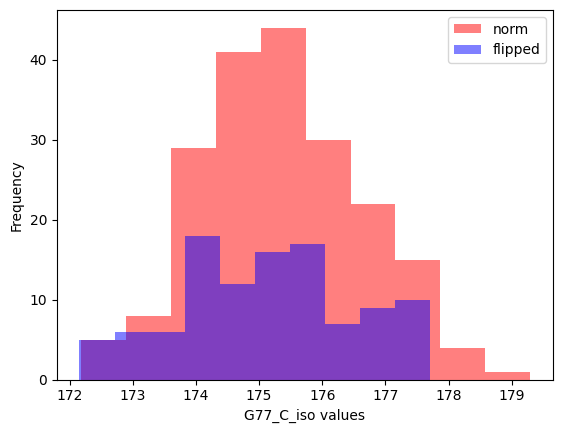

In [77]:
#now plot N distribution
# Create a figure and axis
# Separate iso values based on the 'class'
df=C_G77_pd
class_0_iso = df[df['class'] == 0]['iso']
class_1_iso = df[df['class'] == 1]['iso']

# Plotting
plt.hist(class_0_iso, alpha=0.5, color='red', label='norm')
plt.hist(class_1_iso, alpha=0.5, color='blue', label='flipped')
plt.xlabel('G77_C_iso values')
plt.ylabel('Frequency')
plt.legend()
plt.show()

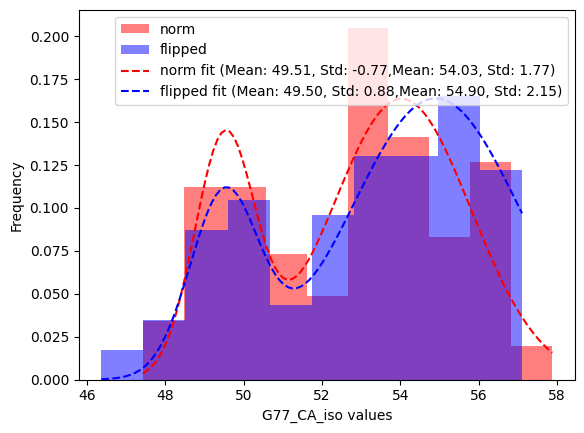

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Function for the sum of two Gaussian distributions
def double_gaussian(x, mu1, sigma1, A1, mu2, sigma2, A2):
    return (
        A1 * np.exp(-0.5 * ((x - mu1) / sigma1) ** 2) + 
        A2 * np.exp(-0.5 * ((x - mu2) / sigma2) ** 2)
    )

# Your existing DataFrame
df = CA_G77_pd

# Data for the two classes
class_0_iso = df[df['class'] == 0]['iso']
class_1_iso = df[df['class'] == 1]['iso']

# Plotting histograms
plt.hist(class_0_iso, alpha=0.5, color='red', label='norm', density=True)
plt.hist(class_1_iso, alpha=0.5, color='blue', label='flipped', density=True)
plt.xlabel('G77_CA_iso values')
plt.ylabel('Frequency')

# Gaussian fit to class 0
mu_0, std_0 = np.mean(class_0_iso), np.std(class_0_iso)
x_0 = np.linspace(min(class_0_iso), max(class_0_iso), 100)
hist_0, bins_0 = np.histogram(class_0_iso, bins=30, density=True)
params_0, _ = curve_fit(
    double_gaussian, 
    0.5 * (bins_0[1:] + bins_0[:-1]), 
    hist_0, 
    #p0=[61, 3, 1,70, 4, 1],
    #p0=[110, 3, 1,120, 4, 1],
    #p0=[175, 3, 1,179, 4, 1],
    #p0=[33.5, 3, 1, 35.5, 4, 1],
    p0=[49, 2, 0.2, 54, 2, 0.2],
    maxfev=5000  # Increase maxfev from the default value
)
plt.plot(
    x_0, 
    double_gaussian(x_0, *params_0), 
    color='red', 
    linestyle='--', 
    label=f'norm fit (Mean: {params_0[0]:.2f}, Std: {params_0[1]:.2f},Mean: {params_0[3]:.2f}, Std: {params_0[4]:.2f})'
)

# Gaussian fit to class 1
mu_1, std_1 = np.mean(class_1_iso), np.std(class_1_iso)
x_1 = np.linspace(min(class_1_iso), max(class_1_iso), 100)
hist_1, bins_1 = np.histogram(class_1_iso, bins=30, density=True)
params_1, _ = curve_fit(
    double_gaussian, 
    0.5 * (bins_1[1:] + bins_1[:-1]), 
    hist_1, 
    #p0=[61, 3, 1,70, 4, 1],
    #p0=[110, 3, 1,120, 4, 1],
    #p0=[174, 3, 1,180, 4, 1],
    #p0=[33.5, 3, 1, 35.5, 4, 1],
    p0=[49, 2, 0.2, 54, 2, 0.2],
    maxfev=5000  # Increase maxfev from the default value
)
plt.plot(
    x_1, 
    double_gaussian(x_1, *params_1), 
    color='blue', 
    linestyle='--', 
    label=f'flipped fit (Mean: {params_1[0]:.2f}, Std: {params_1[1]:.2f},Mean: {params_1[3]:.2f}, Std: {params_1[4]:.2f})'
)

plt.legend()
plt.show()

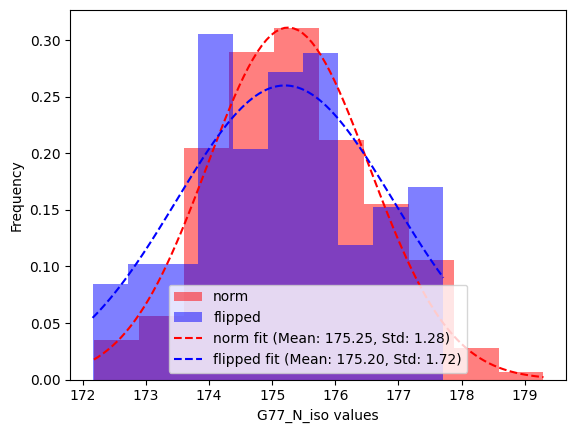

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Function for Gaussian distribution
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)
df=C_G77_pd

# Data
class_0_iso = df[df['class'] == 0]['iso']
class_1_iso = df[df['class'] == 1]['iso']

# Plotting histograms
plt.hist(class_0_iso, alpha=0.5, color='red', label='norm', density=True)
plt.hist(class_1_iso, alpha=0.5, color='blue', label='flipped', density=True)
plt.xlabel('G77_N_iso values')
plt.ylabel('Frequency')

# Gaussian fit to class 0
mu_0, std_0 = np.mean(class_0_iso), np.std(class_0_iso)
x_0 = np.linspace(min(class_0_iso), max(class_0_iso), 100)
hist_0, bins_0 = np.histogram(class_0_iso, bins=30, density=True)
params_0, _ = curve_fit(gaussian, 0.5 * (bins_0[1:] + bins_0[:-1]), hist_0, p0=[mu_0, std_0, 1])
plt.plot(x_0, gaussian(x_0, *params_0), color='red', linestyle='--', label=f'norm fit (Mean: {params_0[0]:.2f}, Std: {params_0[1]:.2f})')

# Gaussian fit to class 1
mu_1, std_1 = np.mean(class_1_iso), np.std(class_1_iso)
x_1 = np.linspace(min(class_1_iso), max(class_1_iso), 100)
hist_1, bins_1 = np.histogram(class_1_iso, bins=30, density=True)
params_1, _ = curve_fit(gaussian, 0.5 * (bins_1[1:] + bins_1[:-1]), hist_1, p0=[mu_1, std_1, 1])
plt.plot(x_1, gaussian(x_1, *params_1), color='blue', linestyle='--', label=f'flipped fit (Mean: {params_1[0]:.2f}, Std: {params_1[1]:.2f})')

plt.legend()
#plt.savefig('N_')
plt.show()


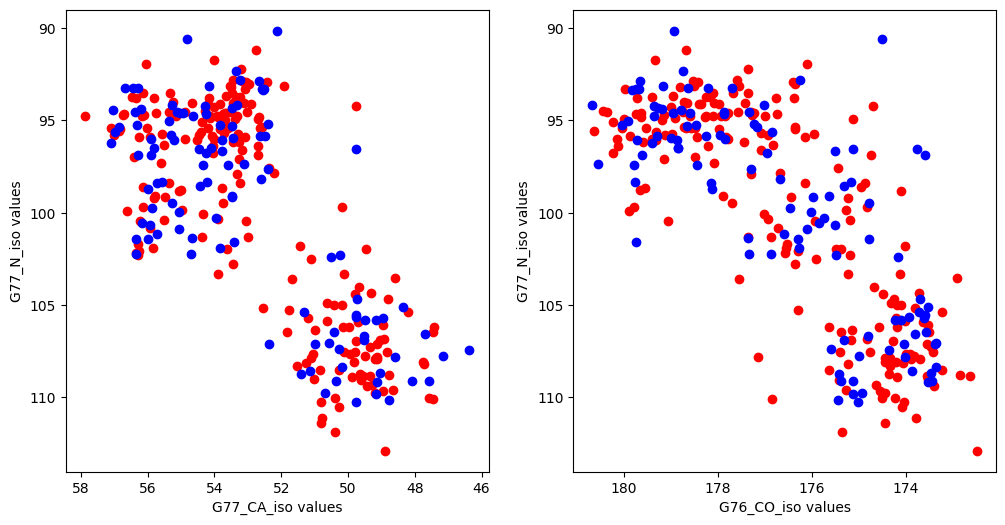

In [23]:
#plot NCA and NCO
fig, (ax1, ax2)=plt.subplots(1,2,figsize=(12,6))
df1=N_G77_pd
df2=CA_G77_pd
df3=CO_V76_pd
# Data
Nclass_0_iso = df1[df1['class'] == 0]['iso']
Nclass_1_iso = df1[df1['class'] == 1]['iso']
CAclass_0_iso = df2[df2['class'] == 0]['iso']
CAclass_1_iso = df2[df2['class'] == 1]['iso']
COclass_0_iso = df3[df3['class'] == 0]['iso']
COclass_1_iso = df3[df3['class'] == 1]['iso']

ax1.plot(CAclass_0_iso,Nclass_0_iso,'ro')
ax1.plot(CAclass_1_iso,Nclass_1_iso,'bo')

ax1.set_ylabel('G77_N_iso values')
ax1.set_xlabel('G77_CA_iso values')

ax1.invert_xaxis()
ax1.invert_yaxis()


ax2.plot(COclass_0_iso,Nclass_0_iso,'ro')
ax2.plot(COclass_1_iso,Nclass_1_iso,'bo')

ax2.set_ylabel('G77_N_iso values')
ax2.set_xlabel('G76_CO_iso values')

ax2.invert_xaxis()
ax2.invert_yaxis()


Text(0, 0.5, '$^{15}$N Shift (ppm)')

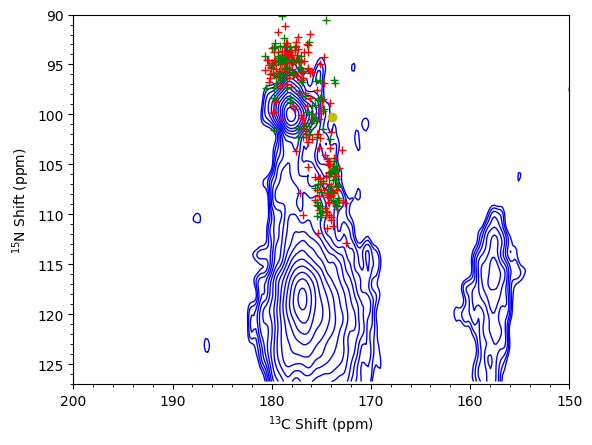

In [24]:
#import NMR data and overlay with the above plot
cord_dir = "/Users/yunyao_1/Documents/Experiments_Data/data/Oct23_1.9mm_KcsA_V94AG116_DM_gammaCD2/127/pdata/1"
dic, data = ng.bruker.read_pdata(cord_dir)

udic = ng.bruker.guess_udic(dic, data)
uc1 = ng.fileiobase.uc_from_udic(udic, dim=1) # direct C
uc0 = ng.fileiobase.uc_from_udic(udic, dim=0)  # indirect N
ppm1 = uc1.ppm_scale()
ppm0 = uc0.ppm_scale()

noise = np.std(data[uc1(300, 'ppm'):uc1(280, 'ppm'), uc0(120, 'ppm'):uc0(110, 'ppm')])

levels = noise* 1.25**np.arange(16) * 3
lims=[[200,150],[127,90]]

plt.contour(ppm1, ppm0, data, levels, colors='blue', linewidths=1)
plt.plot(COclass_0_iso,Nclass_0_iso,'r+')
plt.plot(COclass_1_iso,Nclass_1_iso,'g+')
#plot assignment from chemical shift table
plt.plot(173.88,100.3,'yo')
plt.xlim(lims[0])
plt.ylim(lims[1])
plt.minorticks_on()
plt.xlabel(r'$^{13}$C Shift (ppm)')
plt.ylabel(r'$^{15}$N Shift (ppm)')

Text(0, 0.5, 'V76_psi')

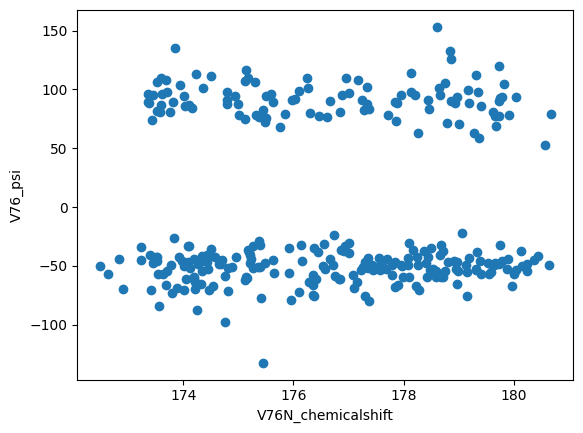

In [151]:
# in the following plot the correlation between CS and torsion angle
#first read in the torsion angle file
file_path='./minimalized_v76_phi_angle'
v76_psi_pd = pd.read_csv(file_path,index_col=0)
len(v76_psi_pd)
# Map letters to numbers
#letter_to_number = {'a': 261, 'b': 55, 'c': 158, 'd': 364}
new_column_names = {'a': 261, 'b': 55, 'c': 158, 'd': 364}
v76_psi_pd = v76_psi_pd.rename(columns=new_column_names)
'''
v76_psi_pd
	261	55	158	364
800	87.969692	75.243872	-33.009498	-49.128601
380	-46.480520	99.688054	-49.195144	-49.667004
960	76.989013	90.937699	-48.759930	-52.698918
790	75.680854	105.981975	-40.734965	-54.853080
550	-49.549937	95.153985	-44.549700	-32.81623

'''

#assign torsion angle values to the V76_torsion
#V76_torsion in dictionary fortmat{'index': df}
#adding class label based on torsion angles
for key, df in V76_torsion.items():
    # Add class label based on the torsion angles
    for i, row in df.iterrows():
        #if (str(key), row['resNO']-1) in norm_mapped_list: # -1 is used as the mapped list is for V76 
        V76_torsion[key].loc[i, 'psi'] = v76_psi_pd.loc[key, row['resNO']]
        #print(v76_psi_pd.loc[key, row['resNO']])
#a glime of new V76_torsion
#print(V76_torsion[10].head())
'''
    resNO atom resNam      iso    delta    ita    alpha    betta    gamma  \
46     55    N    VAL  119.184  101.090  0.130   20.726  165.773  178.949   
48     55   CA    VAL   70.435  -20.472  0.161  107.483  110.775  139.837   
50     55   CB    VAL   35.796  -14.684  0.522  142.828  150.495  168.688   
52     55  CG1    VAL   22.684  -28.787  0.321  148.096  157.350  195.903   
56     55  CG2    VAL   24.370  -22.954  0.453  148.752  159.154  188.384   

    class        psi  
46    0.0 -42.241518  
48    0.0 -42.241518  
50    0.0 -42.241518  
52    0.0 -42.241518  
56    0.0 -42.241518 

'''

# as priviously we did, extra and then concat one nuclei at a time
N_V76=[]
CO_V76=[]
CA_V76=[]
CB_V76=[]
for entry in V76_torsion.values():
    N_V76.append(entry[entry['atom'] == 'N'])
    CO_V76.append(entry[entry['atom'] == 'C'])
    CA_V76.append(entry[entry['atom'] == 'CA'])
    CB_V76.append(entry[entry['atom'] == 'CB'])

N_V76_pd=pd.concat(N_V76)
CO_V76_pd=pd.concat(CO_V76)
CA_V76_pd=pd.concat(CA_V76)
CB_V76_pd=pd.concat(CB_V76)

# A glime of N_V76_pd
'''
	resNO	atom	resNam	iso	delta	ita	alpha	betta	gamma	class	psi
46	55	N	VAL	110.974	101.037	0.099	28.989	175.562	185.526	1.0	105.981975
164	158	N	VAL	109.840	104.400	0.132	26.760	176.483	190.237	0.0	-40.734965
282	261	N	VAL	113.950	110.260	0.127	16.790	175.174	189.185	1.0	75.680854
'''
#now plot the iso and psi
plt.plot(CO_V76_pd['iso'],CO_V76_pd['psi'],'o')
plt.xlabel('V76N_chemicalshift')
plt.ylabel('V76_psi')

Text(0, 0.5, 'V76_chi1')

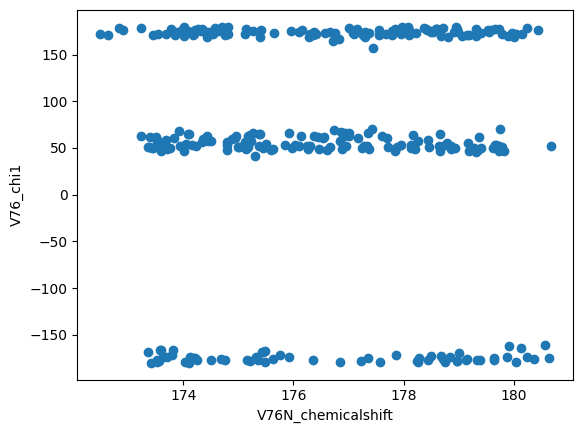

In [153]:
# in the following plot the correlation between CS and chi1 angle
#first read in the torsion angle file
file_path='./minimalized_v76_chi1_angle'
v76_chi1_pd = pd.read_csv(file_path,index_col=0)
#len(v76_psi_pd)
# Map letters to numbers
#letter_to_number = {'a': 261, 'b': 55, 'c': 158, 'd': 364}
new_column_names = {'a': 261, 'b': 55, 'c': 158, 'd': 364}
v76_chi1_pd = v76_chi1_pd.rename(columns=new_column_names)


#assign torsion angle values to the V76_torsion
#V76_torsion in dictionary fortmat{'index': df}
#adding class label based on torsion angles
for key, df in V76_torsion.items():
    # Add class label based on the torsion angles
    for i, row in df.iterrows():
        #if (str(key), row['resNO']-1) in norm_mapped_list: # -1 is used as the mapped list is for V76 
        V76_torsion[key].loc[i, 'chi1'] = v76_chi1_pd.loc[key, row['resNO']]
        #print(v76_psi_pd.loc[key, row['resNO']])
#a glime of new V76_torsion
#print(V76_torsion[10].head())

# as priviously we did, extra and then concat one nuclei at a time
N_V76=[]
CO_V76=[]
CA_V76=[]
CB_V76=[]
for entry in V76_torsion.values():
    N_V76.append(entry[entry['atom'] == 'N'])
    CO_V76.append(entry[entry['atom'] == 'C'])
    CA_V76.append(entry[entry['atom'] == 'CA'])
    CB_V76.append(entry[entry['atom'] == 'CB'])

N_V76_pd=pd.concat(N_V76)
CO_V76_pd=pd.concat(CO_V76)
CA_V76_pd=pd.concat(CA_V76)
CB_V76_pd=pd.concat(CB_V76)

# A glime of N_V76_pd
'''
	resNO	atom	resNam	iso	delta	ita	alpha	betta	gamma	class	psi
46	55	N	VAL	110.974	101.037	0.099	28.989	175.562	185.526	1.0	105.981975
164	158	N	VAL	109.840	104.400	0.132	26.760	176.483	190.237	0.0	-40.734965
282	261	N	VAL	113.950	110.260	0.127	16.790	175.174	189.185	1.0	75.680854
'''
#now plot the iso and psi
plt.plot(CO_V76_pd['iso'],CO_V76_pd['chi1'],'o')
plt.xlabel('V76N_chemicalshift')
plt.ylabel('V76_chi1')

Text(0, 0.5, 'V76_chi1')

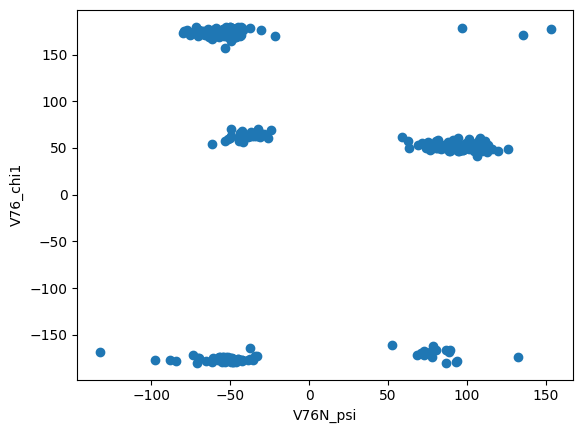

In [154]:
plt.plot(CO_V76_pd['psi'],CO_V76_pd['chi1'],'o')
plt.xlabel('V76N_psi')
plt.ylabel('V76_chi1')

array([-5.34109836,  2.74379538,  1.37274426,  3.66022623, -0.25931023,
       -2.2906    ,  4.64568977])

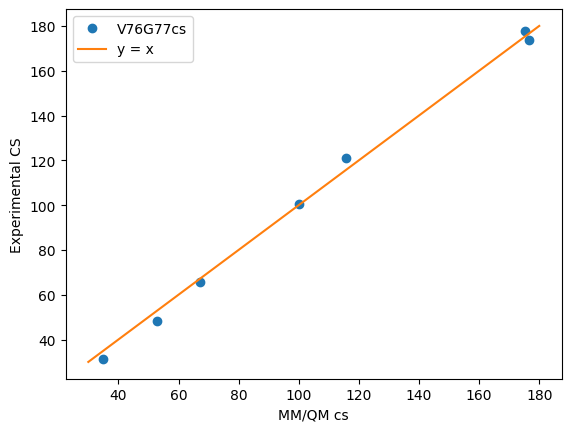

In [170]:
#compare the mean of predict cs to experiemntal ones
# chemicsl shift V76 N CO CA CB G77 N CO CA
#pre_cs=[]
pre_cs=[N_V76_pd['iso'].mean(), CO_V76_pd['iso'].mean(), CA_V76_pd['iso'].mean(), CB_V76_pd['iso'].mean(),N_G77_pd['iso'].mean(), C_G77_pd['iso'].mean(), CA_G77_pd['iso'].mean()]
exp_cs=[121.2,173.88,65.66,31.3,100.3,177.58,48.2]
plt.plot(pre_cs,exp_cs,'o',label='V76G77cs')
plt.xlabel('MM/QM cs')
plt.ylabel('Experimental CS')
x = range(30, 181)

# y = x (y is equal to x)
y = range(30, 181)

# Plot the line y = x
plt.plot(x, y, label='y = x')
plt.legend()
np.array(pre_cs)-np.array(exp_cs)

In [151]:
# Extract 'N' atom 'iso' values and their corresponding classes
# #extra Iso data 
# N_=[]
# C_=[]
# CA_=[]
# CB_=[]
# CG2_=[]
# Thr54_df=pd.DataFrame(columns=['N','C','CA','CB','CG2'])
# for keys, item in cc0111_dict.items():
#     if item.loc[(values['resNO'] in list([]))&(item['atom']=='N')]['iso'].values.size!=0:
#         N_.append(item.loc[(values['resNO']==54)&(item['atom']=='N')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='C')]['iso'].values.size!=0:
#         C_.append(item.loc[(values['resNO']==54)&(item['atom']=='C')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CA')]['iso'].values.size!=0:
#         CA_.append(item.loc[(values['resNO']==54)&(item['atom']=='CA')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CB')]['iso'].values.size!=0:
#         CB_.append(item.loc[(values['resNO']==54)&(item['atom']=='CB')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CG2')]['iso'].values.size!=0:
#         CG2_.append(item.loc[(values['resNO']==54)&(item['atom']=='CG2')]['iso'].values[0])
# #     if item.loc[(values['resNO']==54)&(item['atom']=='C')]['iso'].size==0:
# #         print(keys)
# # Thr54_df['N']=N_Thr54
# # Thr54_df['C']=C_Thr54
# # Thr54_df['CA']=CA_Thr54
# # Thr54_df['CB']=CB_Thr54
# # Thr54_df['CG2']=CG2_Thr54
# # Thr54_df.index=cc0111_dict.keys()
# C_

In [13]:
#a
cc0111_dict['results_960'].loc[(cc0111_dict['results_960']['resNO']==54)&(cc0111_dict['results_960']['atom']=='C')]['iso'].values[0]

177.538

In [150]:
#data analysis
#extra Iso data 
# N_Thr54=[]
# C_Thr54=[]
# CA_Thr54=[]
# CB_Thr54=[]
# CG2_Thr54=[]
# Thr54_df=pd.DataFrame(columns=['N','C','CA','CB','CG2'])
# for keys, values in cc0111_dict.items():
#     if item.loc[(values['resNO']==54)&(item['atom']=='N')]['iso'].values.size!=0:
#         N_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='N')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='C')]['iso'].values.size!=0:
#         C_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='C')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CA')]['iso'].values.size!=0:
#         CA_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='CA')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CB')]['iso'].values.size!=0:
#         CB_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='CB')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CG2')]['iso'].values.size!=0:
#         CG2_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='CG2')]['iso'].values[0])
# #     if item.loc[(values['resNO']==54)&(item['atom']=='C')]['iso'].size==0:
# #         print(keys)
# Thr54_df['N']=N_Thr54
# Thr54_df['C']=C_Thr54
# Thr54_df['CA']=CA_Thr54
# Thr54_df['CB']=CB_Thr54
# Thr54_df['CG2']=CG2_Thr54
# Thr54_df.index=cc0111_dict.keys()

In [149]:
# for keys, values in cc0111_dict.items():
#     if values.loc[(values['resNO']==54)&(item['atom']=='N')]['iso'].values.size!=0:
#         print(values.loc[(values['resNO']==54)&(item['atom']=='N')]['iso'].values[0])

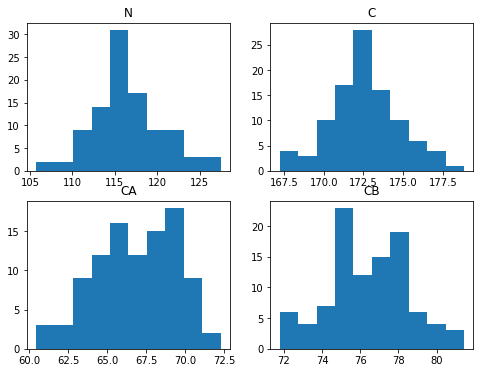

In [115]:
fig,axs=plt.subplots(2,2,figsize=(8, 6))
axs=axs.ravel()
for idx, ax in enumerate (axs):
    ax.hist(Thr54_df.iloc[:,idx])
    ax.set_title(Thr54_df.columns[idx])

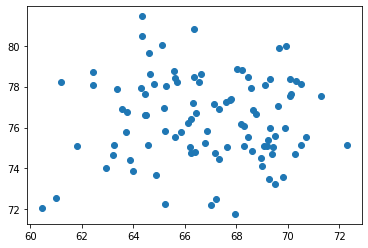

In [119]:
plt.scatter(Thr54_df['CA'],Thr54_df['CB'])

In [39]:
#extra Iso data 
N_Gly77=[]
C_Gly77=[]
CA_Gly77=[]
Gly77_df=pd.DataFrame(columns=['N','C','CA','CB','CG2'])
for keys, values in cc0111_dict.items():
    if values.loc[(values['resNO']==56)&(values['atom']=='N')]['iso'].values.size!=0:
        N_Gly77.append(values.loc[(values['resNO']==56)&(values['atom']=='N')]['iso'].values[0])
    if values.loc[(values['resNO']==56)&(values['atom']=='C')]['iso'].values.size!=0:
        C_Gly77.append(values.loc[(values['resNO']==56)&(values['atom']=='C')]['iso'].values[0])
    if values.loc[(values['resNO']==56)&(values['atom']=='CA')]['iso'].values.size!=0:
        CA_Gly77.append(values.loc[(values['resNO']==56)&(values['atom']=='CA')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CB')]['iso'].values.size!=0:
#         CB_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='CB')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CG2')]['iso'].values.size!=0:
#         CG2_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='CG2')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='C')]['iso'].size==0:
#         print(keys)
Gly77_df['N']=N_Gly77
Gly77_df['C']=C_Gly77
Gly77_df['CA']=CA_Gly77
#Thr54_df['CB']=CB_Thr54
#Thr54_df['CG2']=CG2_Thr54
Gly77_df.index=cc0111_dict.keys()

In [40]:
Gly77_df

,N,C,CA,CB,CG2
results_790,103.888,177.491,44.930,NaN,NaN
results_960,106.633,178.556,52.805,NaN,NaN
results_380,99.266,177.792,55.585,NaN,NaN
results_60,101.688,172.989,52.759,NaN,NaN
results_800,107.756,181.756,58.437,NaN,NaN
...,...,...,...,...,...
results_830,107.383,178.228,48.282,NaN,NaN
results_50,110.465,179.385,59.585,NaN,NaN
results_170,88.117,175.317,56.588,NaN,NaN
results_400,82.470,171.781,57.043,NaN,NaN


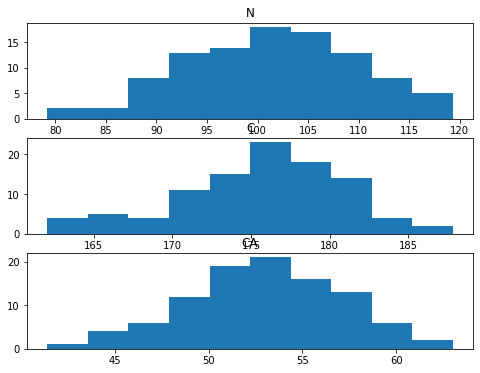

In [41]:
fig,axs=plt.subplots(3,1,figsize=(8, 6))
axs=axs.ravel()
for idx, ax in enumerate (axs):
    ax.hist(Gly77_df.iloc[:,idx])
    ax.set_title(Gly77_df.columns[idx])

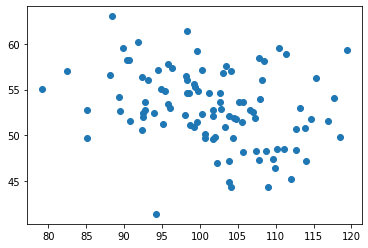

In [42]:
plt.scatter(Gly77_df['N'],Gly77_df['CA'])

In [43]:
#extra Iso data 
N_Val76=[]
C_Val76=[]
CA_Val76=[]
Val76_df=pd.DataFrame(columns=['N','C','CA','CB','CG2'])
for keys, values in cc0111_dict.items():
    if values.loc[(values['resNO']==55)&(values['atom']=='N')]['iso'].values.size!=0:
        N_Val76.append(values.loc[(values['resNO']==55)&(values['atom']=='N')]['iso'].values[0])
    if values.loc[(values['resNO']==55)&(values['atom']=='C')]['iso'].values.size!=0:
        C_Val76.append(values.loc[(values['resNO']==55)&(values['atom']=='C')]['iso'].values[0])
    if values.loc[(values['resNO']==55)&(values['atom']=='CA')]['iso'].values.size!=0:
        CA_Val76.append(values.loc[(values['resNO']==55)&(values['atom']=='CA')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CB')]['iso'].values.size!=0:
#         CB_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='CB')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='CG2')]['iso'].values.size!=0:
#         CG2_Thr54.append(item.loc[(values['resNO']==54)&(item['atom']=='CG2')]['iso'].values[0])
#     if item.loc[(values['resNO']==54)&(item['atom']=='C')]['iso'].size==0:
#         print(keys)
Val76_df['N']=N_Val76
Val76_df['C']=C_Val76
Val76_df['CA']=CA_Val76
#Thr54_df['CB']=CB_Thr54
#Thr54_df['CG2']=CG2_Thr54
Val76_df.index=cc0111_dict.keys()

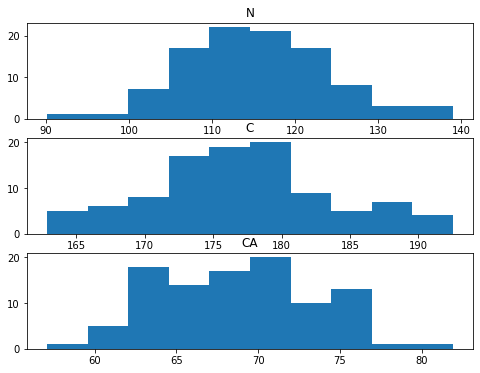

In [44]:
fig,axs=plt.subplots(3,1,figsize=(8, 6))
axs=axs.ravel()
for idx, ax in enumerate (axs):
    ax.hist(Val76_df.iloc[:,idx])
    ax.set_title(Val76_df.columns[idx])

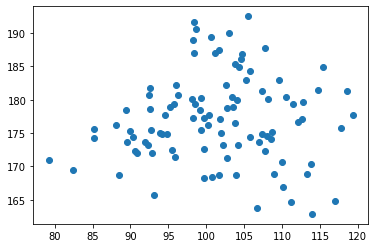

In [45]:
plt.scatter(Gly77_df['N'],Val76_df['C'])

In [130]:
num=cc0111_dict['results_960']['resNO'].values
num2=[*set(num)]
df_resNO=[]
for resNO in num2:
    df_resNO.append(str(resNO)+'_df')
    
df_resNO

['258_df',
 '259_df',
 '260_df',
 '261_df',
 '361_df',
 '362_df',
 '363_df',
 '364_df',
 '52_df',
 '53_df',
 '54_df',
 '55_df',
 '155_df',
 '156_df',
 '157_df',
 '158_df']

In [173]:
CC_total={}
for idx, df in zip(num2,df_resNO):
    N_cc=[]
    C_cc=[]
    CA_cc=[]
    CB_cc=[]
    CG2_cc=[]
    CG1_cc=[]
    CC_total[df]=pd.DataFrame(columns=['N','C','CA','CB','CG1','CG2'])
    for keys, item in cc0111_dict.items():
        if  item.loc[(values['resNO']==idx)&(item['atom']=='N')]['iso'].values.size!=0:
            N_cc.append(item.loc[(values['resNO']==idx)&(item['atom']=='N')]['iso'].values[0])
        if item.loc[(values['resNO']==idx)&(item['atom']=='C')]['iso'].values.size!=0:
            C_cc.append(item.loc[(values['resNO']==idx)&(item['atom']=='C')]['iso'].values[0])        
        if item.loc[(values['resNO']==idx)&(item['atom']=='CA')]['iso'].values.size!=0:
            CA_cc.append(item.loc[(values['resNO']==idx)&(item['atom']=='CA')]['iso'].values[0])
        if item.loc[(values['resNO']==idx)&(item['atom']=='CB')]['iso'].values.size!=0:
            CB_cc.append(item.loc[(values['resNO']==idx)&(item['atom']=='CB')]['iso'].values[0])
        if item.loc[(values['resNO']==idx)&(item['atom']=='CG2')]['iso'].values.size!=0:
            CG2_cc.append(item.loc[(values['resNO']==idx)&(item['atom']=='CG2')]['iso'].values[0])
    #         print(keys)
    CC_total[df]['N']=pd.Series(N_cc)
    CC_total[df]['C']=pd.Series(C_cc)
    CC_total[df]['CA']=pd.Series(CA_cc)
    CC_total[df]['CB']=pd.Series(CB_cc)
    CC_total[df]['CG2']=pd.Series(CG2_cc)
    CC_total[df]['CG1']=pd.Series(CG1_cc)
    CC_total[df].index=cc0111_dict.keys()

<ipython-input-173-a33823cf7bfc>:22: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  CC_total[df]['N']=pd.Series(N_cc)
<ipython-input-173-a33823cf7bfc>:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  CC_total[df]['C']=pd.Series(C_cc)
<ipython-input-173-a33823cf7bfc>:24: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  CC_total[df]['CA']=pd.Series(CA_cc)
<ipython-input-173-a33823cf7bfc>:25: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  CC_total[df]['CB']=pd.Series(CB_cc)
<ipython-input-173-a33823cf7bfc>:26: Dep

ValueError: Length mismatch: Expected axis has 0 elements, new values have 100 elements

In [168]:
CC_total.keys()

dict_keys(['258_df', '259_df', '260_df', '261_df', '361_df', '362_df', '363_df', '364_df', '52_df', '53_df', '54_df', '55_df', '155_df', '156_df', '157_df', '158_df'])

array([[<AxesSubplot:title={'center':'N'}>,
        <AxesSubplot:title={'center':'C'}>],
       [<AxesSubplot:title={'center':'CA'}>,
        <AxesSubplot:title={'center':'CB'}>],
       [<AxesSubplot:title={'center':'CG1'}>,
        <AxesSubplot:title={'center':'CG2'}>]], dtype=object)

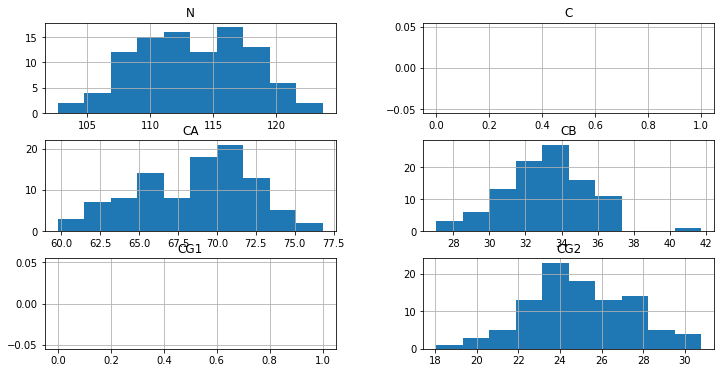

In [163]:
CC_total['55_df'].hist(figsize=(12,6))

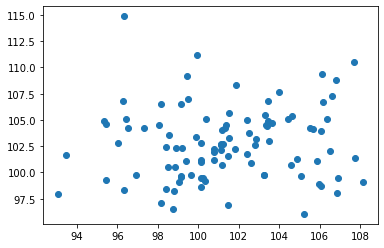

In [166]:
# correlation between monomers
plt.scatter(CC_total['53_df']['N'],CC_total['156_df']['N'])

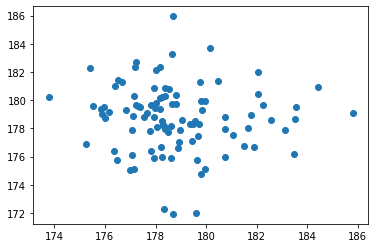

In [167]:
# correlation between monomers
plt.scatter(CC_total['53_df']['C'],CC_total['156_df']['C'])